Import the nessecary libraries, and add labels to the dataset.
Create a CSV file from that new data set and save it as a CSV file.
Use that CSV file as the main data set from now on. Missing values are set to be equal to "?" and changed to "NaN"

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zlib import crc32
from sklearn.model_selection import train_test_split
import seaborn as sns


'''
#---------read the attribute names first------------------
with open('Names.txt', 'r') as file:
    attributes = file.readlines()
columnNames = [line.split()[-2] for line in attributes if line.startswith('@attribute')]   
#we are only interested in the name itself, delete everything else     

#---------read the data-----------------
dataset = pd.read_csv('communities.data', header=None)
dataset.columns = columnNames
#dataset.to_csv('DatasetWithHeaders', index=False) 
#Only need to run this once, so therefore its commented out
'''
#The new dataset with labels.
datasetWithHeaders = pd.read_csv('DatasetWithHeaders', na_values=["?"])  
print(datasetWithHeaders.head())



   state  county  community        communityname  fold  population  \
0      8     NaN        NaN         Lakewoodcity     1        0.19   
1     53     NaN        NaN          Tukwilacity     1        0.00   
2     24     NaN        NaN         Aberdeentown     1        0.00   
3     34     5.0    81440.0  Willingborotownship     1        0.04   
4     42    95.0     6096.0    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06  

Check how many columns contain missing values (denoted with "NaN") and find how much percent of that feature has missing values in it.

In [35]:

columnsWithNaN = [column for column in datasetWithHeaders.columns 
                  if datasetWithHeaders[column].isna().any()]
columnPercentages = {}
listOfFeaturesWithMissingValue = []
for column in columnsWithNaN:
    percentQuestionMark = (datasetWithHeaders[column].isna().mean() * 100)
    columnPercentages[column] = percentQuestionMark
    listOfFeaturesWithMissingValue.append(column)
    
for column, percentage in columnPercentages.items():
    print(f"Percentage of 'NaN' values in column '{column}': {percentage:.2f}%")

print(listOfFeaturesWithMissingValue)



Percentage of 'NaN' values in column 'county': 58.88%
Percentage of 'NaN' values in column 'community': 59.03%
Percentage of 'NaN' values in column 'OtherPerCap': 0.05%
Percentage of 'NaN' values in column 'LemasSwornFT': 84.00%
Percentage of 'NaN' values in column 'LemasSwFTPerPop': 84.00%
Percentage of 'NaN' values in column 'LemasSwFTFieldOps': 84.00%
Percentage of 'NaN' values in column 'LemasSwFTFieldPerPop': 84.00%
Percentage of 'NaN' values in column 'LemasTotalReq': 84.00%
Percentage of 'NaN' values in column 'LemasTotReqPerPop': 84.00%
Percentage of 'NaN' values in column 'PolicReqPerOffic': 84.00%
Percentage of 'NaN' values in column 'PolicPerPop': 84.00%
Percentage of 'NaN' values in column 'RacialMatchCommPol': 84.00%
Percentage of 'NaN' values in column 'PctPolicWhite': 84.00%
Percentage of 'NaN' values in column 'PctPolicBlack': 84.00%
Percentage of 'NaN' values in column 'PctPolicHisp': 84.00%
Percentage of 'NaN' values in column 'PctPolicAsian': 84.00%
Percentage of 'Na

25 features have missing data, however 22 of the features have 84% of their data missing so we'll remove those from the list.
For "OtherPerCap" (which is referring to per capita income of whose ethnicity is other than the ones listed in the dataset) we will
use the mean and fill that in for the missing values.
We will also get rid of any "Not predictive" features except for state. These are:
county, community, communityname and fold.

In [23]:
#Only run this block once, otherwise the columns with the missing values will come back--------
#If this code block is run more than once, then run all of the above code again----------------



listOfFeaturesWithMissingValue = listOfFeaturesWithMissingValue[3:]
newDataSet = datasetWithHeaders.drop(columns=listOfFeaturesWithMissingValue)
cols = ['OtherPerCap']
newDataSet.fillna(newDataSet[cols].mean(), inplace=True)
newDataSet = newDataSet.drop(columns=['county','community','communityname','fold'])


columnsWithMissingValues = newDataSet.columns[newDataSet.isna().any()].tolist()

# Check if there are any missing values
if columnsWithMissingValues:
    print("Columns with missing values:", columnsWithMissingValues)
else:
    print("No missing values in any column.")



No missing values in any column.


We have a supervised task. Its a multiple regression (a univariate regression because we are only trying to predict a single value) task, and we will use batch learning.
The author of the dataset describes that the preprocessing on the data that has been done, is that: 
"All numerical data was normalized into the decimal range 0.00 to 1.00 using an Unsupervised, equal-interval binning method.
Attributes retain their distribution and skew" (https://archive.ics.uci.edu/dataset/183/communities+and+crime), so no further preprocessing will be done on the data set, other than replacing some missing values,
and removing some features which have too many missing values, which was done above.

We will start with setting aside 20% of the data for Testing. This will be chosen randomly.



In [4]:


newTrainset, newTestSet = train_test_split(newDataSet, test_size=0.2, random_state=42)
print(f"Length of newTrainSet: {len(newTrainset)}") #Should be roughly 80% of the data
print(f"Length of newTestSet: {len(newTestSet)}") #Should be roughly 20% of the data
print(newTrainset.head())
newTrainset.describe()



Length of newTrainSet: 1595
Length of newTestSet: 399
      state  population  householdsize  racepctblack  racePctWhite  \
1378     28        0.30           0.48          1.00          0.14   
1826     34        0.00           0.45          0.01          0.96   
678      12        0.00           0.23          0.61          0.50   
1083     25        0.01           0.38          0.03          0.97   
1558      5        0.01           0.41          0.08          0.93   

      racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
1378          0.03         0.01         0.51         0.56         0.39  ...   
1826          0.09         0.05         0.30         0.41         0.23  ...   
678           0.03         0.11         0.22         0.32         0.19  ...   
1083          0.03         0.02         0.61         0.62         0.55  ...   
1558          0.01         0.01         0.39         0.41         0.26  ...   

      PctForeignBorn  PctBornSameState  PctSameHou

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,...,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000
mean,28.588715,0.060019,0.459536,0.185511,0.748207,0.152790,0.146000,0.424307,0.494765,0.336991,...,0.216000,0.606652,0.530489,0.625969,0.650157,0.066671,0.235147,0.164389,0.100909,0.244433
std,16.414720,0.133171,0.164583,0.257438,0.245313,0.207833,0.234299,0.157402,0.144042,0.167286,...,0.232426,0.204564,0.178907,0.198056,0.197667,0.114689,0.205991,0.233903,0.249037,0.235950
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.020000,0.340000,0.410000,0.250000,...,0.060000,0.460000,0.420000,0.525000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,0.020000,0.430000,0.070000,0.840000,0.080000,0.040000,0.400000,0.480000,0.290000,...,0.130000,0.630000,0.540000,0.660000,0.700000,0.040000,0.170000,0.070000,0.000000,0.160000
75%,42.000000,0.050000,0.540000,0.240000,0.940000,0.160000,0.160000,0.470000,0.540000,0.360000,...,0.280000,0.770000,0.650000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now that the dataset has been cleaned up and split into two sets, lets start with looking at
which features have the highest correlation with "ViolentCrimesPerPop".


In [5]:
correlationMatrix = newTrainset.corr()
correlationWithViolentCrimes = correlationMatrix['ViolentCrimesPerPop']
#Lets sort the highest correlations with a ascending order
sortedCorrelation = correlationWithViolentCrimes.sort_values(ascending=False)
print(sortedCorrelation)





ViolentCrimesPerPop    1.000000
PctIlleg               0.740827
racepctblack           0.630521
pctWPubAsst            0.564326
FemalePctDiv           0.555899
                         ...   
PctTeen2Par           -0.666707
PctYoungKids2Par      -0.671895
racePctWhite          -0.676046
PctFam2Par            -0.711932
PctKids2Par           -0.740630
Name: ViolentCrimesPerPop, Length: 102, dtype: float64


It seems we have some middle/strong positive and negative correlations. Lets take a closer look at them. 
We'll create a scatterplot for some of the strongest positive and negative correlations

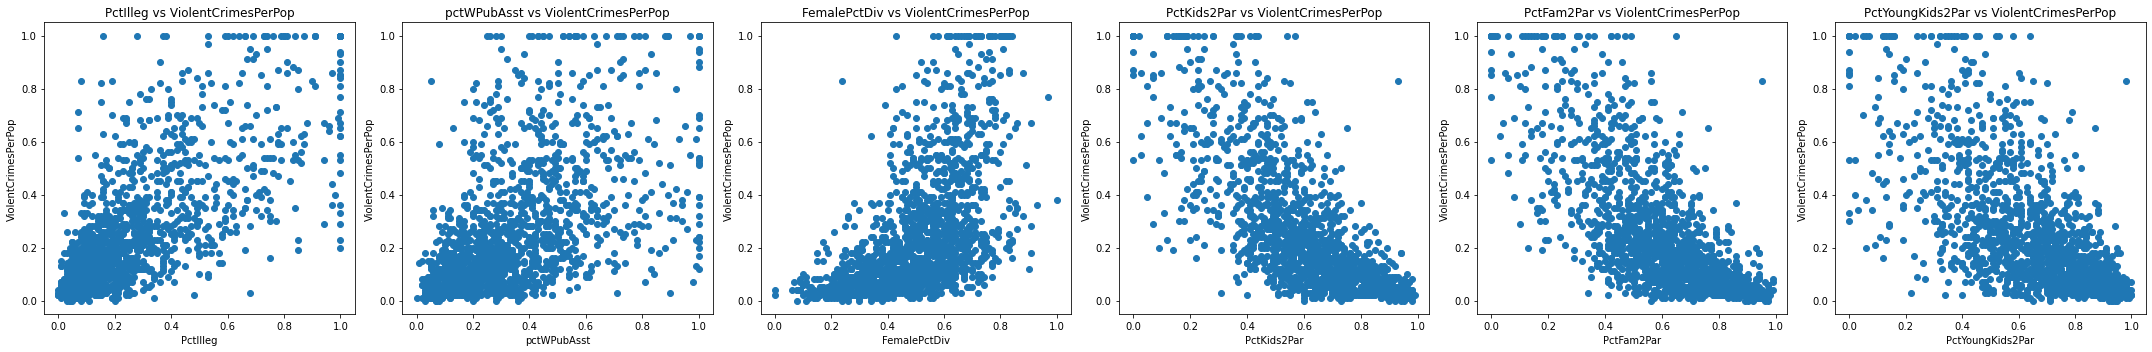

In [29]:
topFeatures = ['PctIlleg', 'pctWPubAsst', 'FemalePctDiv',
                'PctKids2Par', 'PctFam2Par', 'PctYoungKids2Par']
fig, axes = plt.subplots(nrows=1, ncols=len(topFeatures), figsize=(30, 5))
for i, feature in enumerate(topFeatures):
    axes[i].scatter(newTrainset[feature], newTrainset['ViolentCrimesPerPop'])
    axes[i].set_title(f'{feature} vs ViolentCrimesPerPop')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('ViolentCrimesPerPop')

plt.tight_layout()
plt.show()



What we can gather from this is, the lower the percentage of kids born to never married parents (pctIlleg) the lower the crime rate.
Same thing with percentage of households with public assistance income in 1989 (pctWPubAsst) and violent crime.
If a family with kids are headed by two parents (PctFame2Par) the crime rate is lower. 

Since it's a multiple regression task we will start with training a Mutliple regression model, and see if the relationship between the features and the labels is mostly linear
or if we need to implement a more complex model.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Xtrain = newTrainset.drop('ViolentCrimesPerPop', axis=1)
ytrain = newTrainset['ViolentCrimesPerPop']

Xtest = newTestSet.drop('ViolentCrimesPerPop', axis=1)
ytest = newTestSet['ViolentCrimesPerPop']

# Initialize the Linear Regression model
linModel = LinearRegression()

# Train the model on the training set
linModel.fit(Xtrain, ytrain)

# make prediction on test set
ypred = linModel.predict(Xtest)

mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 0.01721875777351829
R-squared: 0.6404950565966216


Mean squared error tells us how close the regression line is to the datapoints. It is the averaged squared difference between the actual values and the predicted values. The lower it is the better.
With a mean squared error of 0.017 we can say that on average the squared difference between the predicted and actual values is relatively low. The predictions are generally close to the actual values.

R-squared is a measure of how well the model explains the variability in the target value, the closer to 1 it is the better. In our case its 0.64, which means that roughly 64% of the variability in the 
target values, can be explained by our model. While this is a moderate level of explanation, it suggests that maybe the relationship between the features and the labels is not strictly linear
the model might oversimplify the relationship in our data. We will try with another model.

Lets try with a Decision Tree regressor, since its good at finding complex nonlinear relationships. 

In [8]:
from sklearn.tree import DecisionTreeRegressor

DecisionTreeModel = DecisionTreeRegressor()
DecisionTreeModel.fit(Xtrain, ytrain)

ypred = DecisionTreeModel.predict(Xtest)

mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.03654035087719298
R-squared: 0.2370856860389705


Ok the with the decisionTreeRegressor the model performs worse than with the multiple regression. Mean squared error is higher than before and R-squared is lower than before. It is a moderate performance on the test set. 
Lets try one last model, namely RandomForestRegressor. RandomForestRegressor is more robust to outliers, and builds upon multiple Decision Trees.

In [9]:
from sklearn.ensemble import RandomForestRegressor
RandomForestModel = RandomForestRegressor(n_estimators=100, random_state=42)

RandomForestModel.fit(Xtrain, ytrain)
ypred = RandomForestModel.predict(Xtest)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.01826869268170426
R-squared: 0.6185738010270043


0.018 mean squared error is very close to the Multiple regression model(0.017), and 0.62 R squared is also very close to the multiple regression model(0.64), concluding that random forest and multiple regression are 
much better model for this dataset than decision tree. Lets do a cross validation on all models, with a split = 10 folds, to reduce the risk of overfitting and see if this changes things, starting with the decision tree.

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeModel, Xtrain, ytrain, scoring="neg_mean_squared_error",
                          cv=10)
RMSEScores = np.sqrt(-scores)
print(f'Score: {scores} \n Mean: {scores.mean()} \n Standard deviation: {scores.std()}')

Score: [-0.02891    -0.0484925  -0.0531975  -0.04622625 -0.03488938 -0.03128113
 -0.02744591 -0.04544591 -0.04183145 -0.0371239 ] 
 Mean: -0.039484392688679246 
 Standard deviation: 0.008404871940382164


Ok so the cross validation improved the model by just a tiny bit, which is still not good. Lets try the cross validation with the multiple regression model instead to see
if that model improves.

In [31]:
linScores = cross_val_score(linModel, Xtrain, ytrain, scoring="neg_mean_squared_error",
                             cv=10)
linRMSEScores = np.sqrt(-linScores)
print(f'Score: {linScores} \n Mean: {linScores.mean()} \n Standard deviation: {linScores.std()}')

Score: [-0.01563347 -0.01682069 -0.02157799 -0.02329768 -0.02636988 -0.01550753
 -0.01443506 -0.01644147 -0.02308559 -0.01844608] 
 Mean: -0.019161543821760735 
 Standard deviation: 0.0038965896452654108


Not much improvement than before where the MSE was 0.017. Now onto the last model random forest regressor

In [32]:
ranScores = cross_val_score(RandomForestModel, Xtrain, ytrain, scoring="neg_mean_squared_error",
                             cv=10)
ranRMSEScores = np.sqrt(-ranScores)
print(f'Score: {ranScores} \n Mean: {ranScores.mean()} \n Standard deviation: {ranScores.std()}')


Score: [-0.0153962  -0.01791342 -0.0197629  -0.02350896 -0.02523822 -0.01527953
 -0.01560839 -0.01802332 -0.02305886 -0.02084908] 
 Mean: -0.019463887492531445 
 Standard deviation: 0.0034356429052596325


An tiny bit of increase in mean squared error for the random forest regressor, it seems that cross validation makes the models better by a small amount.
We have a lot of features and many of them are
highly correlated with the target, perhaps by using dimensionality reduction, we can improve our model.
We will be using Principal Component Analysis (PCA), and then compare the three models directly to see which performs the best.
We had 102 features left in our "newDataset" (preprocessed dataset), and we will first see how many components we can reduce it to, while still 
retaining the variance in the data. I have chosen components between 10 - 20 and then conclude how many components we should choose.


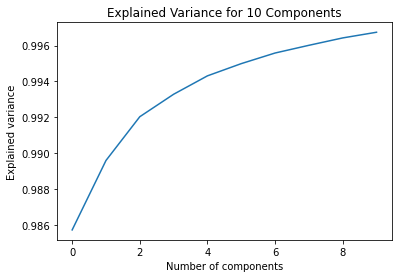

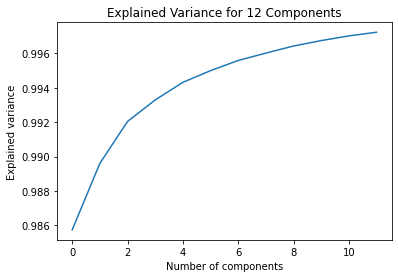

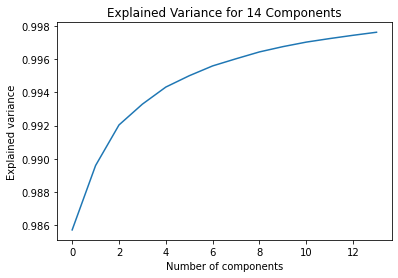

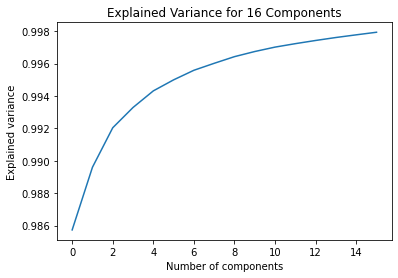

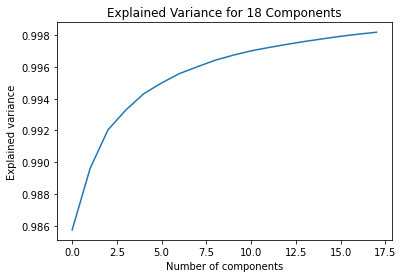

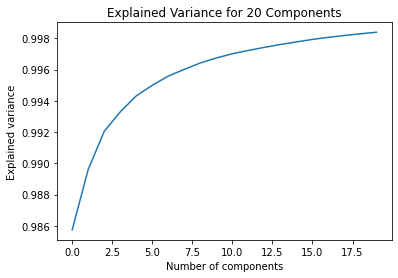

In [13]:
from sklearn.decomposition import PCA

def plotVariance (numberOfComponents, XtrainData, XtestData):
    pca = PCA(n_components=numberOfComponents)
    XtrainPCA = pca.fit_transform(XtrainData)
    XtestPCA = pca.transform(XtestData)
    sumOfVariance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(sumOfVariance)
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance')
    plt.title(f'Explained Variance for {numberOfComponents} Components')
    plt.show()

for components in range(10, 21, 2):
    plotVariance(components, Xtrain, Xtest)

It looks like the explained variance hits a plateau after around 12-16 components. We want to retain as much variance as possible, while still not losing too much information
so lets go with 16 components and test this with our previous three models, and see how well they perform after the transformation.


In [33]:
components = 16
pca = PCA(n_components=components)
XtrainPCA = pca.fit_transform(Xtrain)
XtestPCA = pca.transform(Xtest)

models = {'Multiple Regression':linModel, 
          'DecisionTree':DecisionTreeModel, 
          'Random Forest': RandomForestModel}

def tryModelsWithPCA (XtrainNew, YtrainNew, XtestNew, YtestNew):
    for model_name, model in models.items():
        model.fit(XtrainNew, YtrainNew)

        yPrediction = model.predict(XtestNew)

        newMSE = mean_squared_error(YtestNew, yPrediction)
        r2Score = r2_score(YtestNew, yPrediction)

        # Print results
        print(f'{model_name} Results:')
        print(f'Mean Squared Error: {newMSE}')
        print(f'R-squared: {r2Score}')
        print('-----------------------')
tryModelsWithPCA(XtrainPCA, ytrain, XtestPCA, ytest)

Multiple Regression Results:
Mean Squared Error: 0.017092321049911565
R-squared: 0.6431348885614019
-----------------------
DecisionTree Results:
Mean Squared Error: 0.03345714285714285
R-squared: 0.301459001427243
-----------------------
Random Forest Results:
Mean Squared Error: 0.01796902619047619
R-squared: 0.6248304419755473
-----------------------


Here are the results before dimension reduction for reminder:

Mutliple Regression results:
Mean Squared Error: 0.01721875777351829
R-squared: 0.6404950565966216

DecisionTree Results:
Mean Squared Error: 0.03654035087719298
R-squared: 0.2370856860389705

Random Forest Results:
Mean Squared Error: 0.01826869268170426
R-squared: 0.6185738010270043

So in conclusion dimension reduction had the most positive impact on the Decision tree model, which led to better performance on both the MSE and R-squared which suggest that the reduction in dimension might have helped mitigate the overfitting. The multiple regression and random forest models show consistent or slightly improved performance on both MSE and R-squared by a little, indicating a good fit to the data. 
The model that fit the data "best" was multiple regression with a MSE of 0.0170 and an R-squared of 0.643.
The dimension reduction had a varied impact which slightly improved the models. The performance of the models might suggest that the relationship between the features and the target are not highly complex which makes the linear models more effective.

Link to github repository: https://github.com/tokilava/TokiLavaAIMiniProject7sem